In [105]:
import pandas as pd
import numpy as np
import re


In [2]:
# Reading Data
data = pd.read_json("../data/result.json")

In [4]:
data.head()

,name,type,id,messages
0,تواصل,public_channel,1357097719,"{'id': 1567, 'type': 'message', 'date': '2022-..."
1,تواصل,public_channel,1357097719,"{'id': 1568, 'type': 'message', 'date': '2022-..."
2,تواصل,public_channel,1357097719,"{'id': 1569, 'type': 'message', 'date': '2022-..."
3,تواصل,public_channel,1357097719,"{'id': 1570, 'type': 'message', 'date': '2022-..."
4,تواصل,public_channel,1357097719,"{'id': 1571, 'type': 'message', 'date': '2022-..."


as we can see, our main data is contained in the messages column, it's also embeded as json inside the column


In [9]:
messages = data.messages.to_json()
messages = pd.read_json(messages).T
messages.head()

,id,type,date,date_unixtime,from,from_id,photo,width,height,text,text_entities,edited,edited_unixtime,file,thumbnail,mime_type,media_type,duration_seconds,forwarded_from
0,1567,message,2022-01-02T13:46:28,1641123988,تواصل,channel1357097719,photos/photo_1205@02-01-2022_13-46-28.jpg,800,419,"[Job Title:, {'type': 'hashtag', 'text': '#sen...","[{'type': 'plain', 'text': 'Job Title:'}, {'ty...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1568,message,2022-01-03T11:09:36,1641200976,تواصل,channel1357097719,photos/photo_1206@03-01-2022_11-09-36.jpg,1110,1124,"[Job Title:, {'type': 'hashtag', 'text': '#cas...","[{'type': 'plain', 'text': 'Job Title:'}, {'ty...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1569,message,2022-01-03T14:28:11,1641212891,تواصل,channel1357097719,photos/photo_1207@03-01-2022_14-28-11.jpg,1280,1267,"[Company: , {'type': 'hashtag', 'text': '#Nati...","[{'type': 'plain', 'text': 'Company: '}, {'typ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1570,message,2022-01-03T17:12:13,1641222733,تواصل,channel1357097719,photos/photo_1208@03-01-2022_17-12-13.jpg,1014,1124,"[Job title: , {'type': 'hashtag', 'text': '#Em...","[{'type': 'plain', 'text': 'Job title: '}, {'t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1571,message,2022-01-03T19:16:11,1641230171,تواصل,channel1357097719,photos/photo_1209@03-01-2022_19-16-11.jpg,1062,1125,"[{'type': 'link', 'text': 'https://www.faceboo...","[{'type': 'link', 'text': 'https://www.faceboo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
messages.shape

(923, 19)

In [11]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 923 entries, 0 to 922
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                923 non-null    object
 1   type              923 non-null    object
 2   date              923 non-null    object
 3   date_unixtime     923 non-null    object
 4   from              923 non-null    object
 5   from_id           923 non-null    object
 6   photo             726 non-null    object
 7   width             758 non-null    object
 8   height            758 non-null    object
 9   text              923 non-null    object
 10  text_entities     923 non-null    object
 11  edited            131 non-null    object
 12  edited_unixtime   131 non-null    object
 13  file              32 non-null     object
 14  thumbnail         32 non-null     object
 15  mime_type         32 non-null     object
 16  media_type        1 non-null      object
 17  duration_seconds

In [13]:
messages.describe(include='O')

,id,type,date,date_unixtime,from,from_id,photo,width,height,text,text_entities,edited,edited_unixtime,file,thumbnail,mime_type,media_type,duration_seconds,forwarded_from
count,923,923,923,923,923,923,726,758,758,923,923,131,131,32,32,32,1,1,4
unique,923,1,892,892,1,1,692,201,195,683,683,131,131,1,1,3,1,1,1
top,1567,message,2022-11-16T11:40:21,1668591621,تواصل,channel1357097719,photos/photo_1649@23-07-2022_16-18-54.jpg,720,1280,,[],2022-01-11T16:38:33,1641911913,(File not included. Change data exporting sett...,(File not included. Change data exporting sett...,image/jpeg,video_file,8,تواصل
freq,1,923,8,8,923,923,4,134,166,169,169,1,1,32,32,28,1,1,4


### Initial Data Cleaning

In [19]:
messages.type.unique()

array(['message'], dtype=object)

In [17]:
messages['from'].unique()

array(['تواصل'], dtype=object)

In [18]:
messages['from_id'].unique()

array(['channel1357097719'], dtype=object)

the following columns: *type*, *from*, *from_id* have only one value each, <br>
that make sense, as the data was extracted from a public channel and only admin can send messages, so *from* and *from_id* values will always be the same.<br>
these columns are not useful for our analysis so we will drop them.

In [20]:
messages.drop(columns=['type' , 'from' , 'from_id'] , inplace=True)

### Creating new Column
create a **raw_text** column that contains the message text as a raw string

In [27]:
def convert_to_raw_text(text_entities):
    raw_text = ""
    for item in text_entities:
        raw_text += item["text"]
    return raw_text

In [28]:
raw_text_messages = messages.text_entities.apply(convert_to_raw_text)

In [157]:
raw_text_messages

0      Job Title:#senior and a junior #developer\n \n...
1      Job Title:#cashier\nJob Type: #full_time\n \nش...
2      Company: #National_Technology_Group #NTG)\nJob...
3      Job title: #Employees for Operations Departmen...
4      https://www.facebook.com/384708578676644/posts...
                             ...                        
918                                                     
919    🎲 Company: #kasroad\nJob Title:#UI/UX Designer...
920    🎲 Company: #kasroad\nJob Title: #PHP backend d...
921    🎲 Company: #kasroad\nJob Title: #frontend Deve...
922    📊Job Title: #Social media specialist\nJob loca...
Name: text_entities, Length: 923, dtype: object

In [30]:
messages["raw_text"] = raw_text_messages

In [61]:
# Looking at a random text from messages
print(raw_text_messages[np.random.randint(0,len(raw_text_messages)-1)].split('\n'))

['💎 Job Title: #JAVA Programmer & #PHP programmer ', 'Job Type: #Full_Time', 'Job location: #Damascus', 'مهندس مبرمج (PHP) + مهندس مبرمج (JAVA)', '⛳️مهندس مبرمج (PHP) ', 'خبرة لا تقل عن ثلاث سنوات متمرس في: ', 'API + SQL SERVER + MYSQL ', '', '⛳️مهندس مبرمج (JAVA) ذو خبرة جيدة:', 'Spring FrameWork ', '✔️Javascript ', '✔️MySQL ', '✔️Good Knowledge of English ', '✔️Mongo DB ', 'Send CV to:', 'job@e-sdra.com', '#تواصل #فرص #عمل', '#job #Tawasol #Tawasol_Job #Engineer', '#jobseekers #jobseeker #interview #covid #education #recruiter #jobsearching #engineer #hiringnow  #VacancyNews']


In [58]:
messages.loc[messages.text == '']

,id,date,date_unixtime,photo,width,height,text,text_entities,edited,edited_unixtime,file,thumbnail,mime_type,media_type,duration_seconds,forwarded_from,raw_text
464,2035,2022-07-27T18:25:45,1658935545,photos/photo_1662@27-07-2022_18-25-45.jpg,720,754,,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
467,2038,2022-07-28T13:17:15,1659003435,photos/photo_1664@28-07-2022_13-17-15.jpg,798,999,,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
469,2040,2022-07-28T15:13:50,1659010430,photos/photo_1665@28-07-2022_15-13-50.jpg,785,955,,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
471,2042,2022-07-30T18:09:13,1659193753,photos/photo_1666@30-07-2022_18-09-13.jpg,905,1280,,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
474,2045,2022-07-31T20:53:46,1659290026,photos/photo_1667@31-07-2022_20-53-46.jpg,1080,970,,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,2486,2023-01-05T09:04:40,1672902280,photos/photo_1918@05-01-2023_09-04-40.jpg,1040,1125,,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
905,2489,2023-01-05T10:31:04,1672907464,photos/photo_1919@05-01-2023_10-31-04.jpg,1156,1280,,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
907,2491,2023-01-05T13:09:18,1672916958,photos/photo_1920@05-01-2023_13-09-18.jpg,1069,1280,,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
912,2496,2023-01-07T17:20:47,1673104847,photos/photo_1923@07-01-2023_17-20-47.jpg,1280,1113,,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [59]:
messages.to_csv("../data/messages.csv" , index=False)

## Seperating Job Post messages and others

messages do not always contain a job post info, it may contain an image only, or a link, or it may be empty

we will assume the following:
- if a message contain any of the following keywords *job title* *company* *job type* *job location* then it's a job post
- otherwise, we will assume (just for now) that this message is a non-job post message

In [185]:
messages = pd.read_csv("../data/messages.csv")
messages.raw_text.fillna('', inplace=True)
messages["date"] = pd.to_datetime(messages["date"])

In [187]:
# keep only job posts that was published between 1-1-2022 and 31-1-2023
messages = messages.loc[(messages.date < '2023-01-01') & (messages.date >= '2022-01-01') ]

In [209]:
eng_keywords = ['job title' , 'job location' , 'job type' , 'company', 'job_title', 'title']
arabic_keywords = ['فرصة_تدريب','فرصة_توظيف' , 'فرصة_عمل']
job_post_keywords = eng_keywords + arabic_keywords

job_post = messages.raw_text.apply(lambda text: True if any(x in text.lower() for x in job_post_keywords) else False)

In [210]:
job_post.sum() , job_post.sum()/messages.shape[0]*100

(535, 59.97757847533632)

535 (59%) of messages contains previous keywords <br>
let's investigate other messages

let's gradually build our job posts

In [211]:
non_job_posts = ~job_post
non_job_posts.sum()

In [213]:
empty_message = (messages.raw_text == '')
empty_message.sum()

160

In [215]:
url_regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
only_links = messages.raw_text.apply(lambda text: True if re.match(url_regex, text) else False)
only_links.sum()

164

In [223]:
messages['type'] = np.nan
messages.loc[job_post , 'type'] = 'job_post'
messages.loc[empty_message , 'type'] = 'empty'
messages.loc[only_links , 'type'] = 'link'
messages['type'].fillna("others" ,inplace=True )


In [224]:
messages['type'].value_counts()

job_post    535
link        164
empty       160
others       33
Name: type, dtype: int64

In [225]:
messages.head()

,id,date,date_unixtime,photo,width,height,text,text_entities,edited,edited_unixtime,file,thumbnail,mime_type,media_type,duration_seconds,forwarded_from,raw_text,type
0,1567,2022-01-02 13:46:28,1641123988,photos/photo_1205@02-01-2022_13-46-28.jpg,800.0,419.0,"['Job Title:', {'type': 'hashtag', 'text': '#s...","[{'type': 'plain', 'text': 'Job Title:'}, {'ty...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Job Title:#senior and a junior #developer\n \n...,job_post
1,1568,2022-01-03 11:09:36,1641200976,photos/photo_1206@03-01-2022_11-09-36.jpg,1110.0,1124.0,"['Job Title:', {'type': 'hashtag', 'text': '#c...","[{'type': 'plain', 'text': 'Job Title:'}, {'ty...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Job Title:#cashier\nJob Type: #full_time\n \nش...,job_post
2,1569,2022-01-03 14:28:11,1641212891,photos/photo_1207@03-01-2022_14-28-11.jpg,1280.0,1267.0,"['Company: ', {'type': 'hashtag', 'text': '#Na...","[{'type': 'plain', 'text': 'Company: '}, {'typ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Company: #National_Technology_Group #NTG)\nJob...,job_post
3,1570,2022-01-03 17:12:13,1641222733,photos/photo_1208@03-01-2022_17-12-13.jpg,1014.0,1124.0,"['Job title: ', {'type': 'hashtag', 'text': '#...","[{'type': 'plain', 'text': 'Job title: '}, {'t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Job title: #Employees for Operations Departmen...,job_post
4,1571,2022-01-03 19:16:11,1641230171,photos/photo_1209@03-01-2022_19-16-11.jpg,1062.0,1125.0,"[{'type': 'link', 'text': 'https://www.faceboo...","[{'type': 'link', 'text': 'https://www.faceboo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/384708578676644/posts...,link


some columns are not useful for our analysis so we will drop them <br>

*[edited, edited_unixtime, file, thumbnail, mime_type, media_type, duration_seconds, forwarded_from]*

In [235]:
messages.drop(columns=["edited", "edited_unixtime", "file", "thumbnail",
"mime_type", "media_type", "duration_seconds", "forwarded_from"], inplace=True)

## Check for duplicate job posts

In [258]:
dups = messages[messages.raw_text != ''].duplicated(subset='raw_text')

In [260]:
messages[(messages.raw_text != '') & dups].shape

(72, 10)

some job vacancies are posted multiple times <br>
it may be an indicator for a low hitrate of the company <br>
we will keep those duplicates for now, in order to perform some further analysis on them

In [261]:
messages.to_csv('../data/cleaned_data.csv' , index=False)

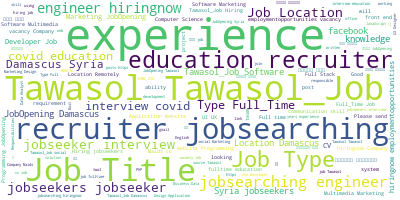

In [262]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(messages['raw_text'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()